## Camera Calibration with OpenCV

## General Steps

- Obtain image/object points
- compute the calibration and undistortion 
    - cv2.calibrateCamera()
    - cv2.undistort()
    
### 1. Extract object points and image points

Image size:  (1280, 960)


[]

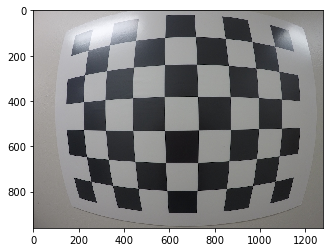

In [39]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

path = 'calibration_wide/'
# read in a calibration image
imgname = 'GOPR0034'
fname = path + imgname + '.jpg'
img = mpimg.imread(fname)
img_size = (img.shape[1], img.shape[0])
print('Image size: ', img_size)

plt.imshow(img)
plt.plot()

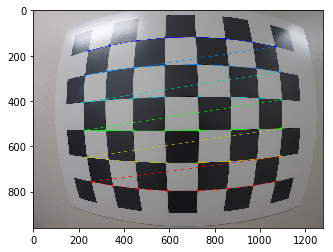

In [36]:
# Array to store object points and image points from all the images

objpoints = []
imgpoints = []

ny = 6
nx = 8
objp = np.zeros((ny*nx, 3), np.float32)
objp[:,:2] = np.mgrid[0:nx, 0:ny].T.reshape(-1,2) # x, y coordinate

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

#Find the chessboard corners
ret, corners = cv2.findChessboardCorners(gray, (nx,ny), None)

if ret == True:
    imgpoints.append(corners)
    objpoints.append(objp)
    
    # draw and display the corners
    img = cv2.drawChessboardCorners(img, (nx,ny), corners, ret)
    
    # display img
    plt.imshow(img)
    plt.plot()

In [37]:
import pickle

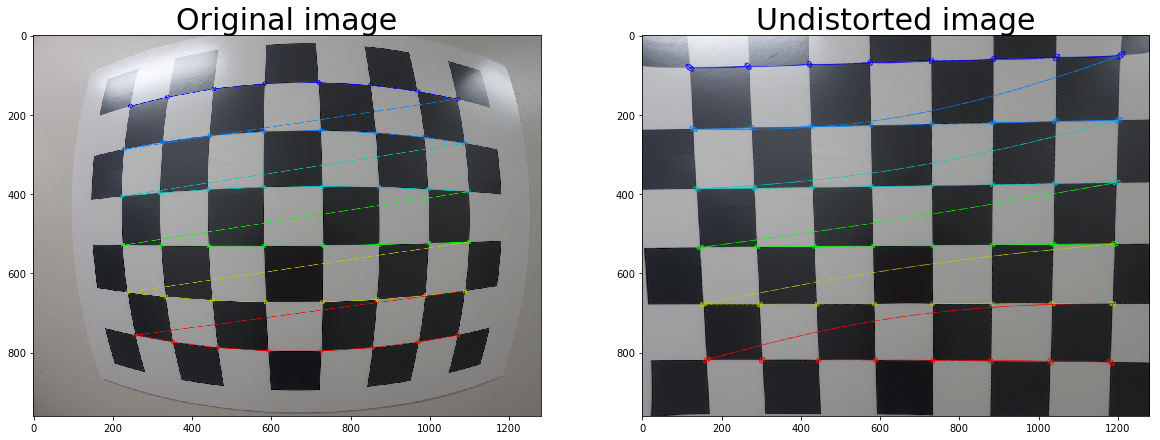

In [38]:
# correct distortion
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints,
                                                   imgpoints, img_size,
                                                   None,
                                                   None)
dst = cv2.undistort(img, mtx, dist, None, mtx)


cv2.imwrite(path + imgname + '_result.jpg', dst)

# save the camera calibration result for later use
# no need to worry about rvecs / tvecs
dist_pickle = {}
dist_pickle['mtx'] = mtx
dist_pickle['dist'] = dist
pickle.dump( dist_pickle, open (path+'wide_dist_pickle.p', 'wb'))

# dst = cv2.cvtColor(dst, cv2.COLOR_BGR2RGB)

# visualize undistortion
f, (ax1, ax2) = plt.subplots(1,2, figsize=(20,10))
ax1.imshow(img)
ax1.set_title('Original image', fontsize=30)
ax2.imshow(dst)
ax2.set_title('Undistorted image', fontsize=30)

In [43]:
def corners_unwarp(img, nx, ny, mtx, dist):
    undist = cv2.undistort(img, mtx, dist, None, mtx)
    gray = cv2.cvtColor(undist, cv2.COLOR_BGR2GRAY)
    
    ret, corners = cv2.findChessboardCorners(gray, (nx,ny), None)
    
    if ret == True:
        cv2.drawChessboardCorners(undist, (nx,ny), corners, ret)
        offset = 100
        img_size = (gray.shape[1], gray.shape[0])
        
        src = np.float32([corners[0], corners[nx-1], corners[-1], corners[-nx]])
        dst = np.float32([[offset, offset], 
                          [img_size[0]-offset, offset],
                          [img_size[0]-offset, img_size[1]-offset],
                          [offset, img_size[1]-offset]])
        
        # perspective transform
        M = cv2.getPerspectiveTransform(src, dst)
        wraped = cv2.warpPerspective(undist, M, img_size)
    
    return wraped, M

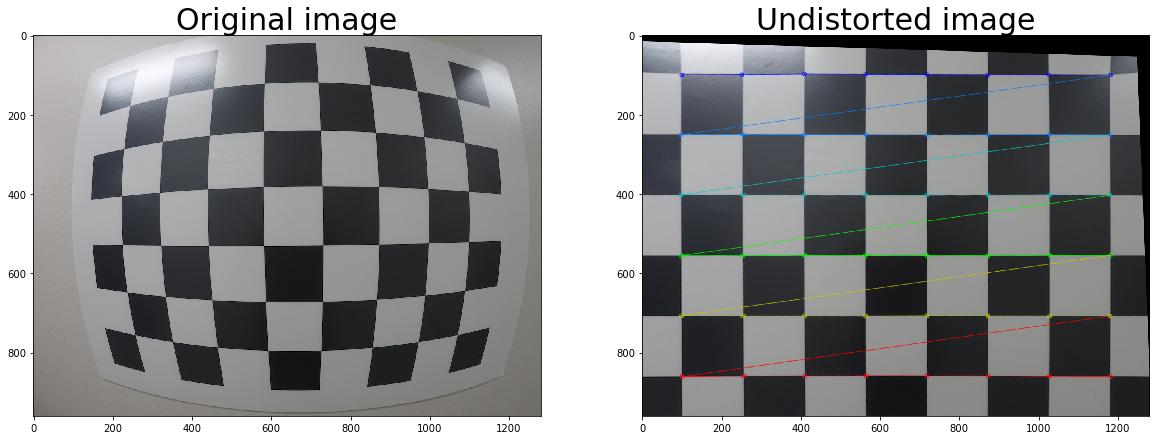

In [45]:
warped, M = corners_unwarp(img, nx, ny, mtx, dist)
# visualize undistortion
f, (ax1, ax2) = plt.subplots(1,2, figsize=(20,10))
ax1.imshow(img)
ax1.set_title('Original image', fontsize=30)
ax2.imshow(warped)
